## Task
Explore dataset generation in scikit-learn

## Notebook Summary
* `make_blobs` - assign normally distributed clusters of points to each class; more control over centers & stdevs of each cluster
* `make_classification` - same as `make_blobs` but with more control over introducing noise via correlation, redundant & uninformative features, multiple clusters per class, etc.
* `make_circles` - make large circle containing small circle with optional noise; useful for testing 2d binary classification for classifiers with spherical boundaries
* `make_gaussian_quantiles` - divide a single Gaussian cluster into near-equal size classes separated by concentric hyperspheres
* `make_moons` - generate 2d binary classification datasets that are challenging to algorithms that assume linear boundaries
* `make_regression` - generate regression targets as a linear combination of random features, with noise

## References
* [scikit-learn Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html#forest-covertypes)


In [20]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sklearn
print 'sklearn.version = ', sklearn.__version__

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__


sklearn.version =  0.18.1
numpy.version =  1.11.3
pandas.version =  0.19.2
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


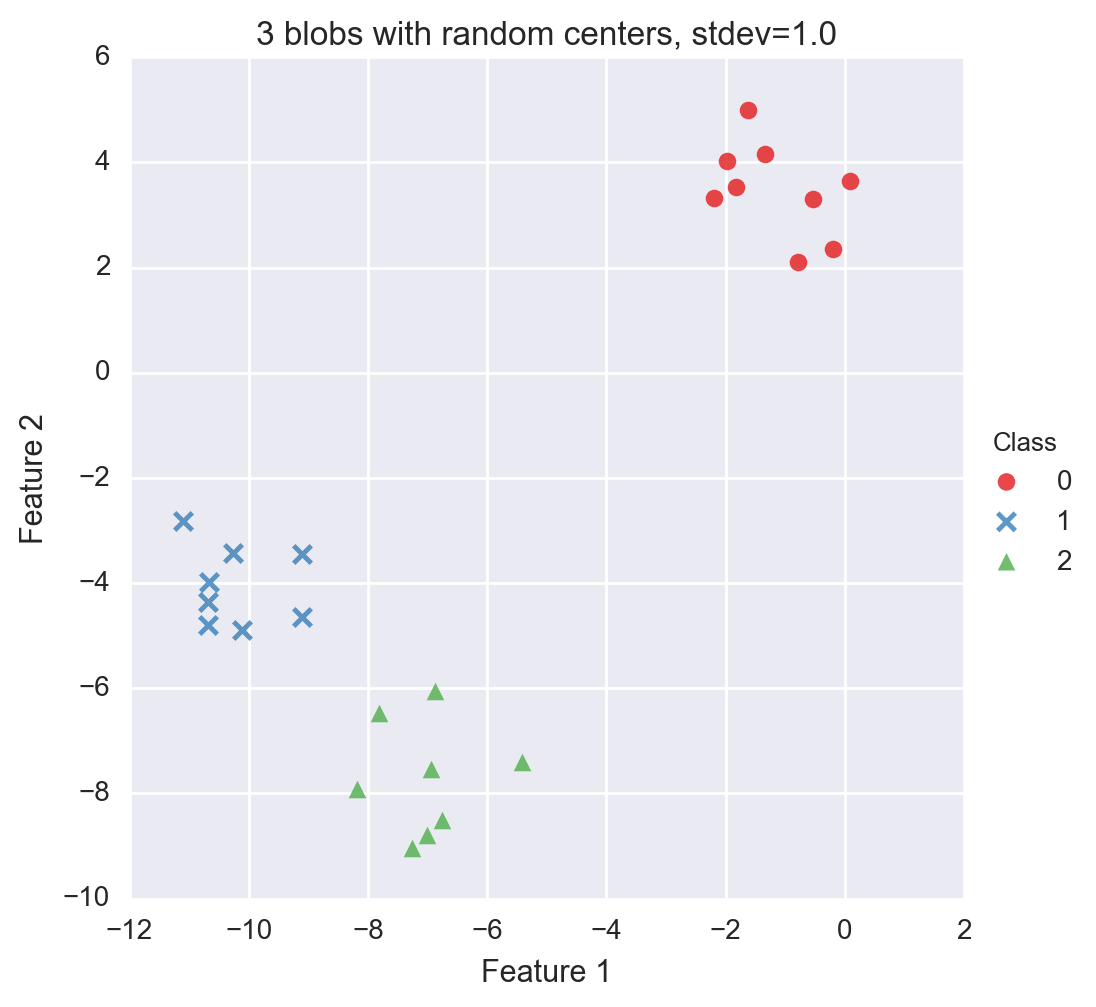

In [21]:
# make_blobs - specify only number of features and centers

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=25, n_features=2, centers=3, random_state=1)
df = pd.DataFrame({
        'Feature 1': X[:,0], 
        'Feature 2': X[:,1], 
        'Class':y}
    ).round(2)

sns.lmplot('Feature 1', 'Feature 2', data=df, hue='Class', palette='Set1', 
           markers=['o', 'x', '^'], scatter_kws={'s':40}, fit_reg=False)
plt.title('3 blobs with random centers, stdev=1.0');


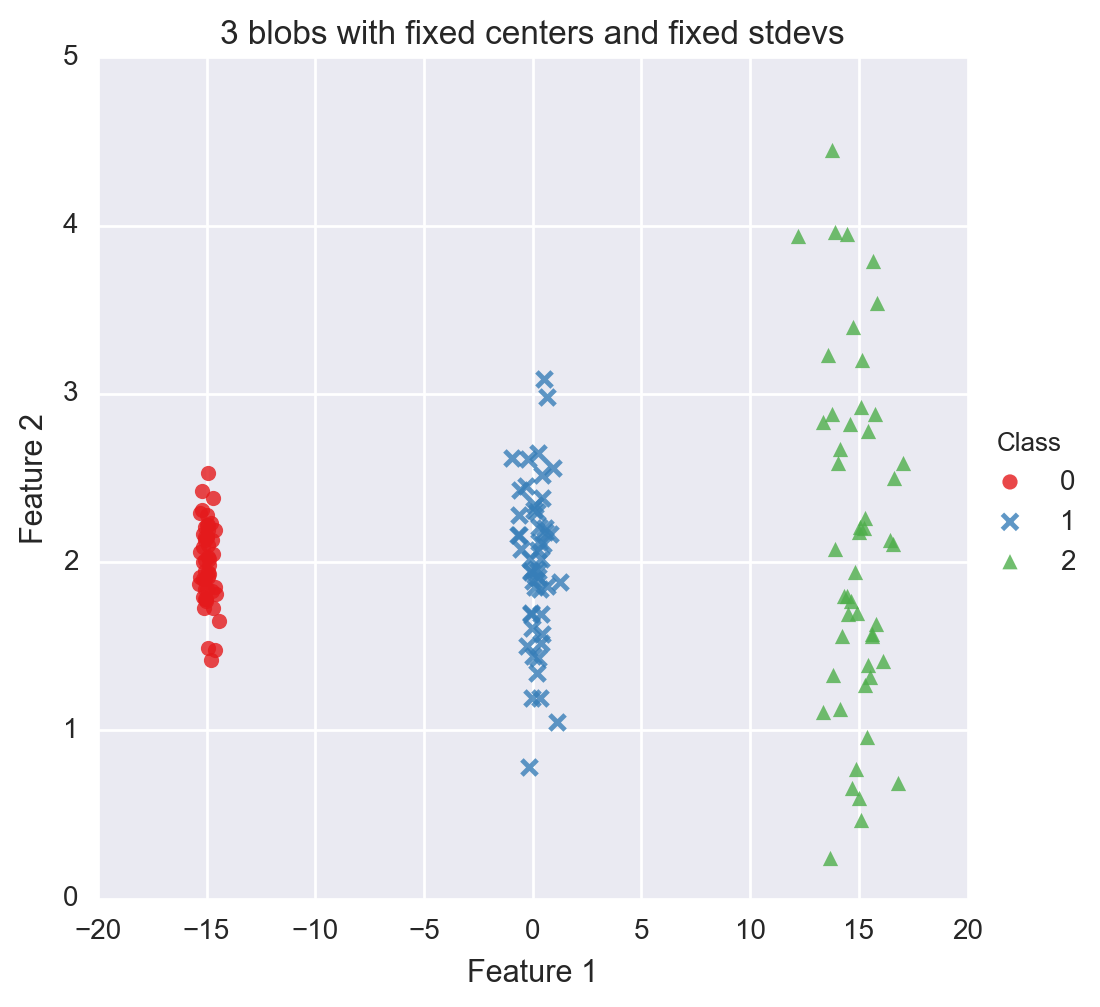

In [22]:
# make_blobs - explicitly specify location of centers and stdevs

centers = np.array([[-15,2],[0,2],[15,2]])
X, y = make_blobs(n_samples=150, centers=centers, cluster_std=[0.25,0.5,1], center_box=[-20,20], random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

sns.lmplot('Feature 1', 'Feature 2', data=df, hue='Class', palette='Set1', 
           markers=['o', 'x', '^'], scatter_kws={'s':30}, fit_reg=False)
plt.title('3 blobs with fixed centers and fixed stdevs')


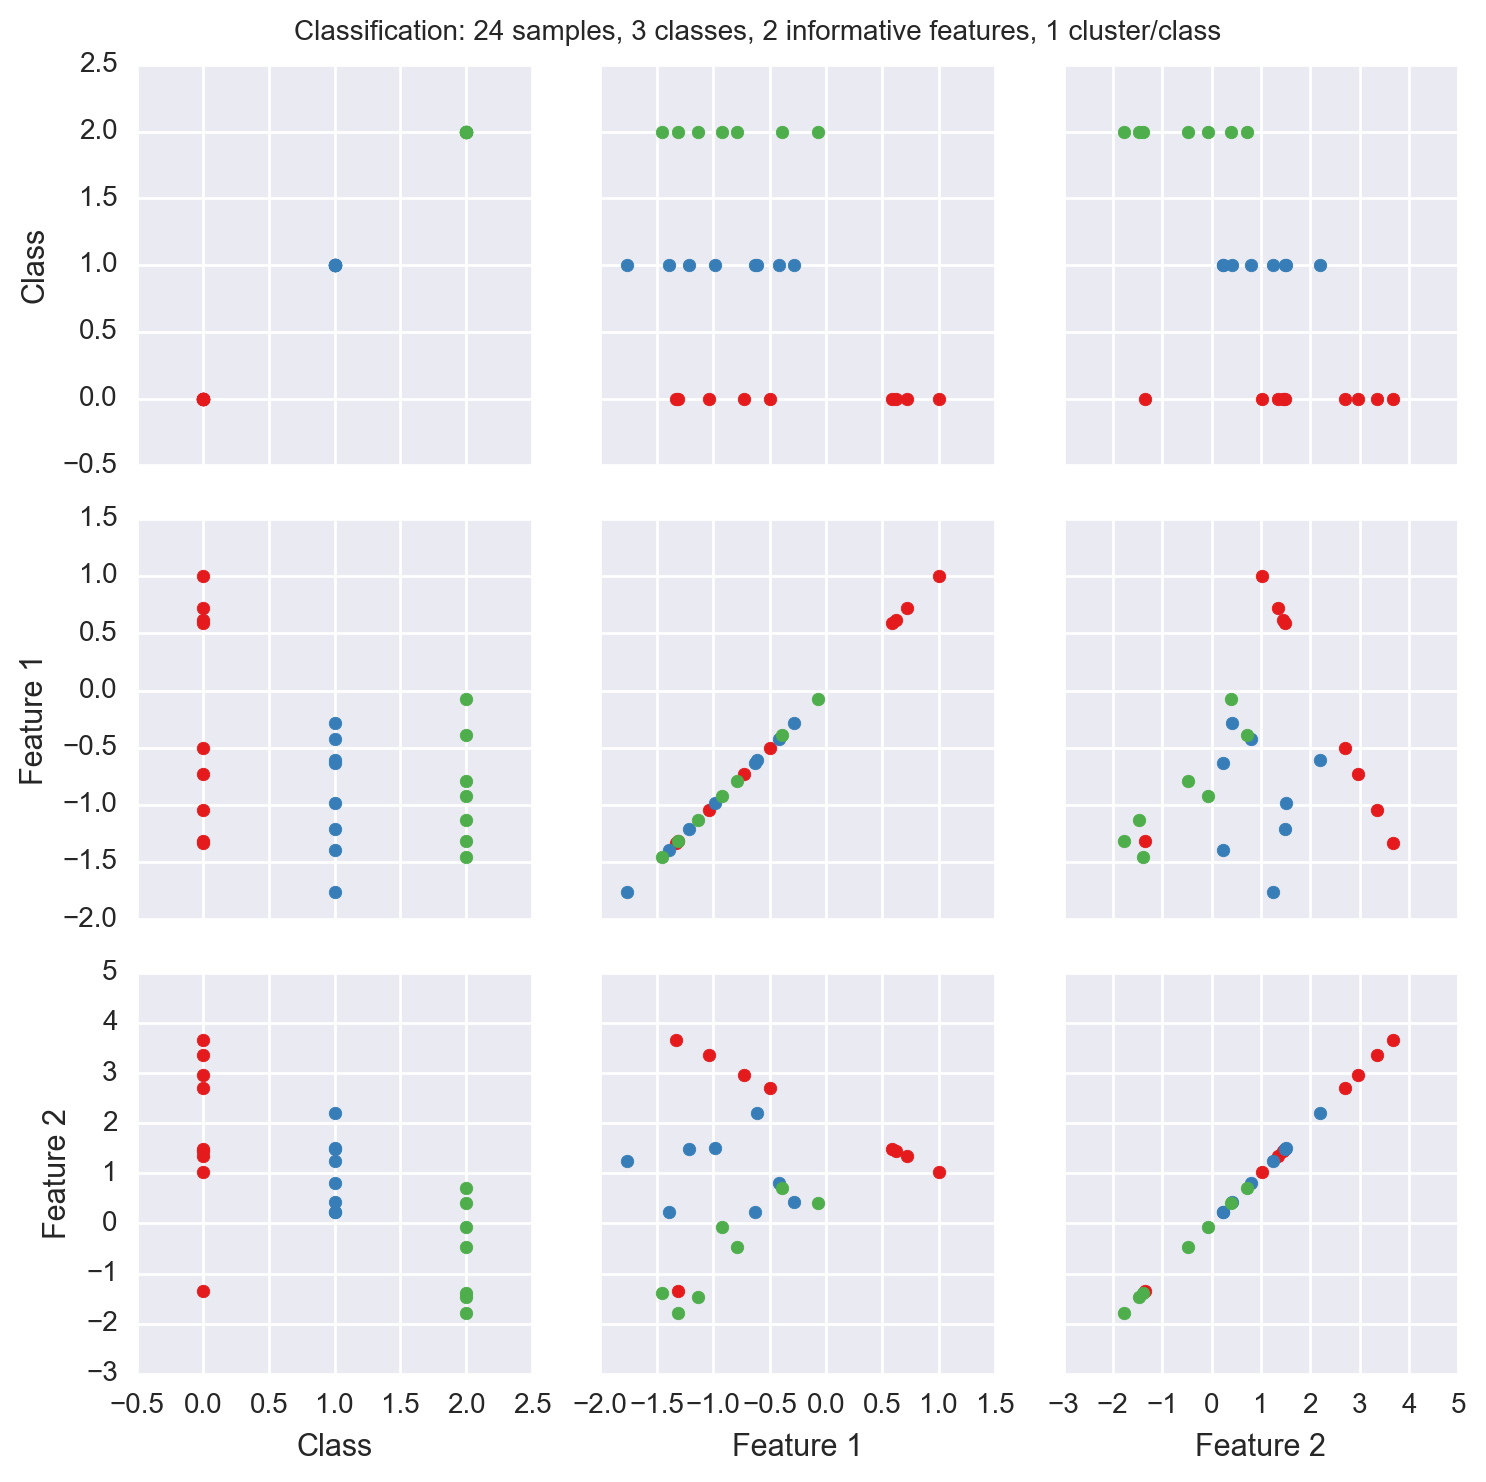

In [23]:
# make_classification - all features informative

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=24, n_features=2, n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=3, n_clusters_per_class=1, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

g = sns.PairGrid(df, palette='Set1', hue='Class')
g = g.map(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Classification: 24 samples, 3 classes, 2 informative features, 1 cluster/class')


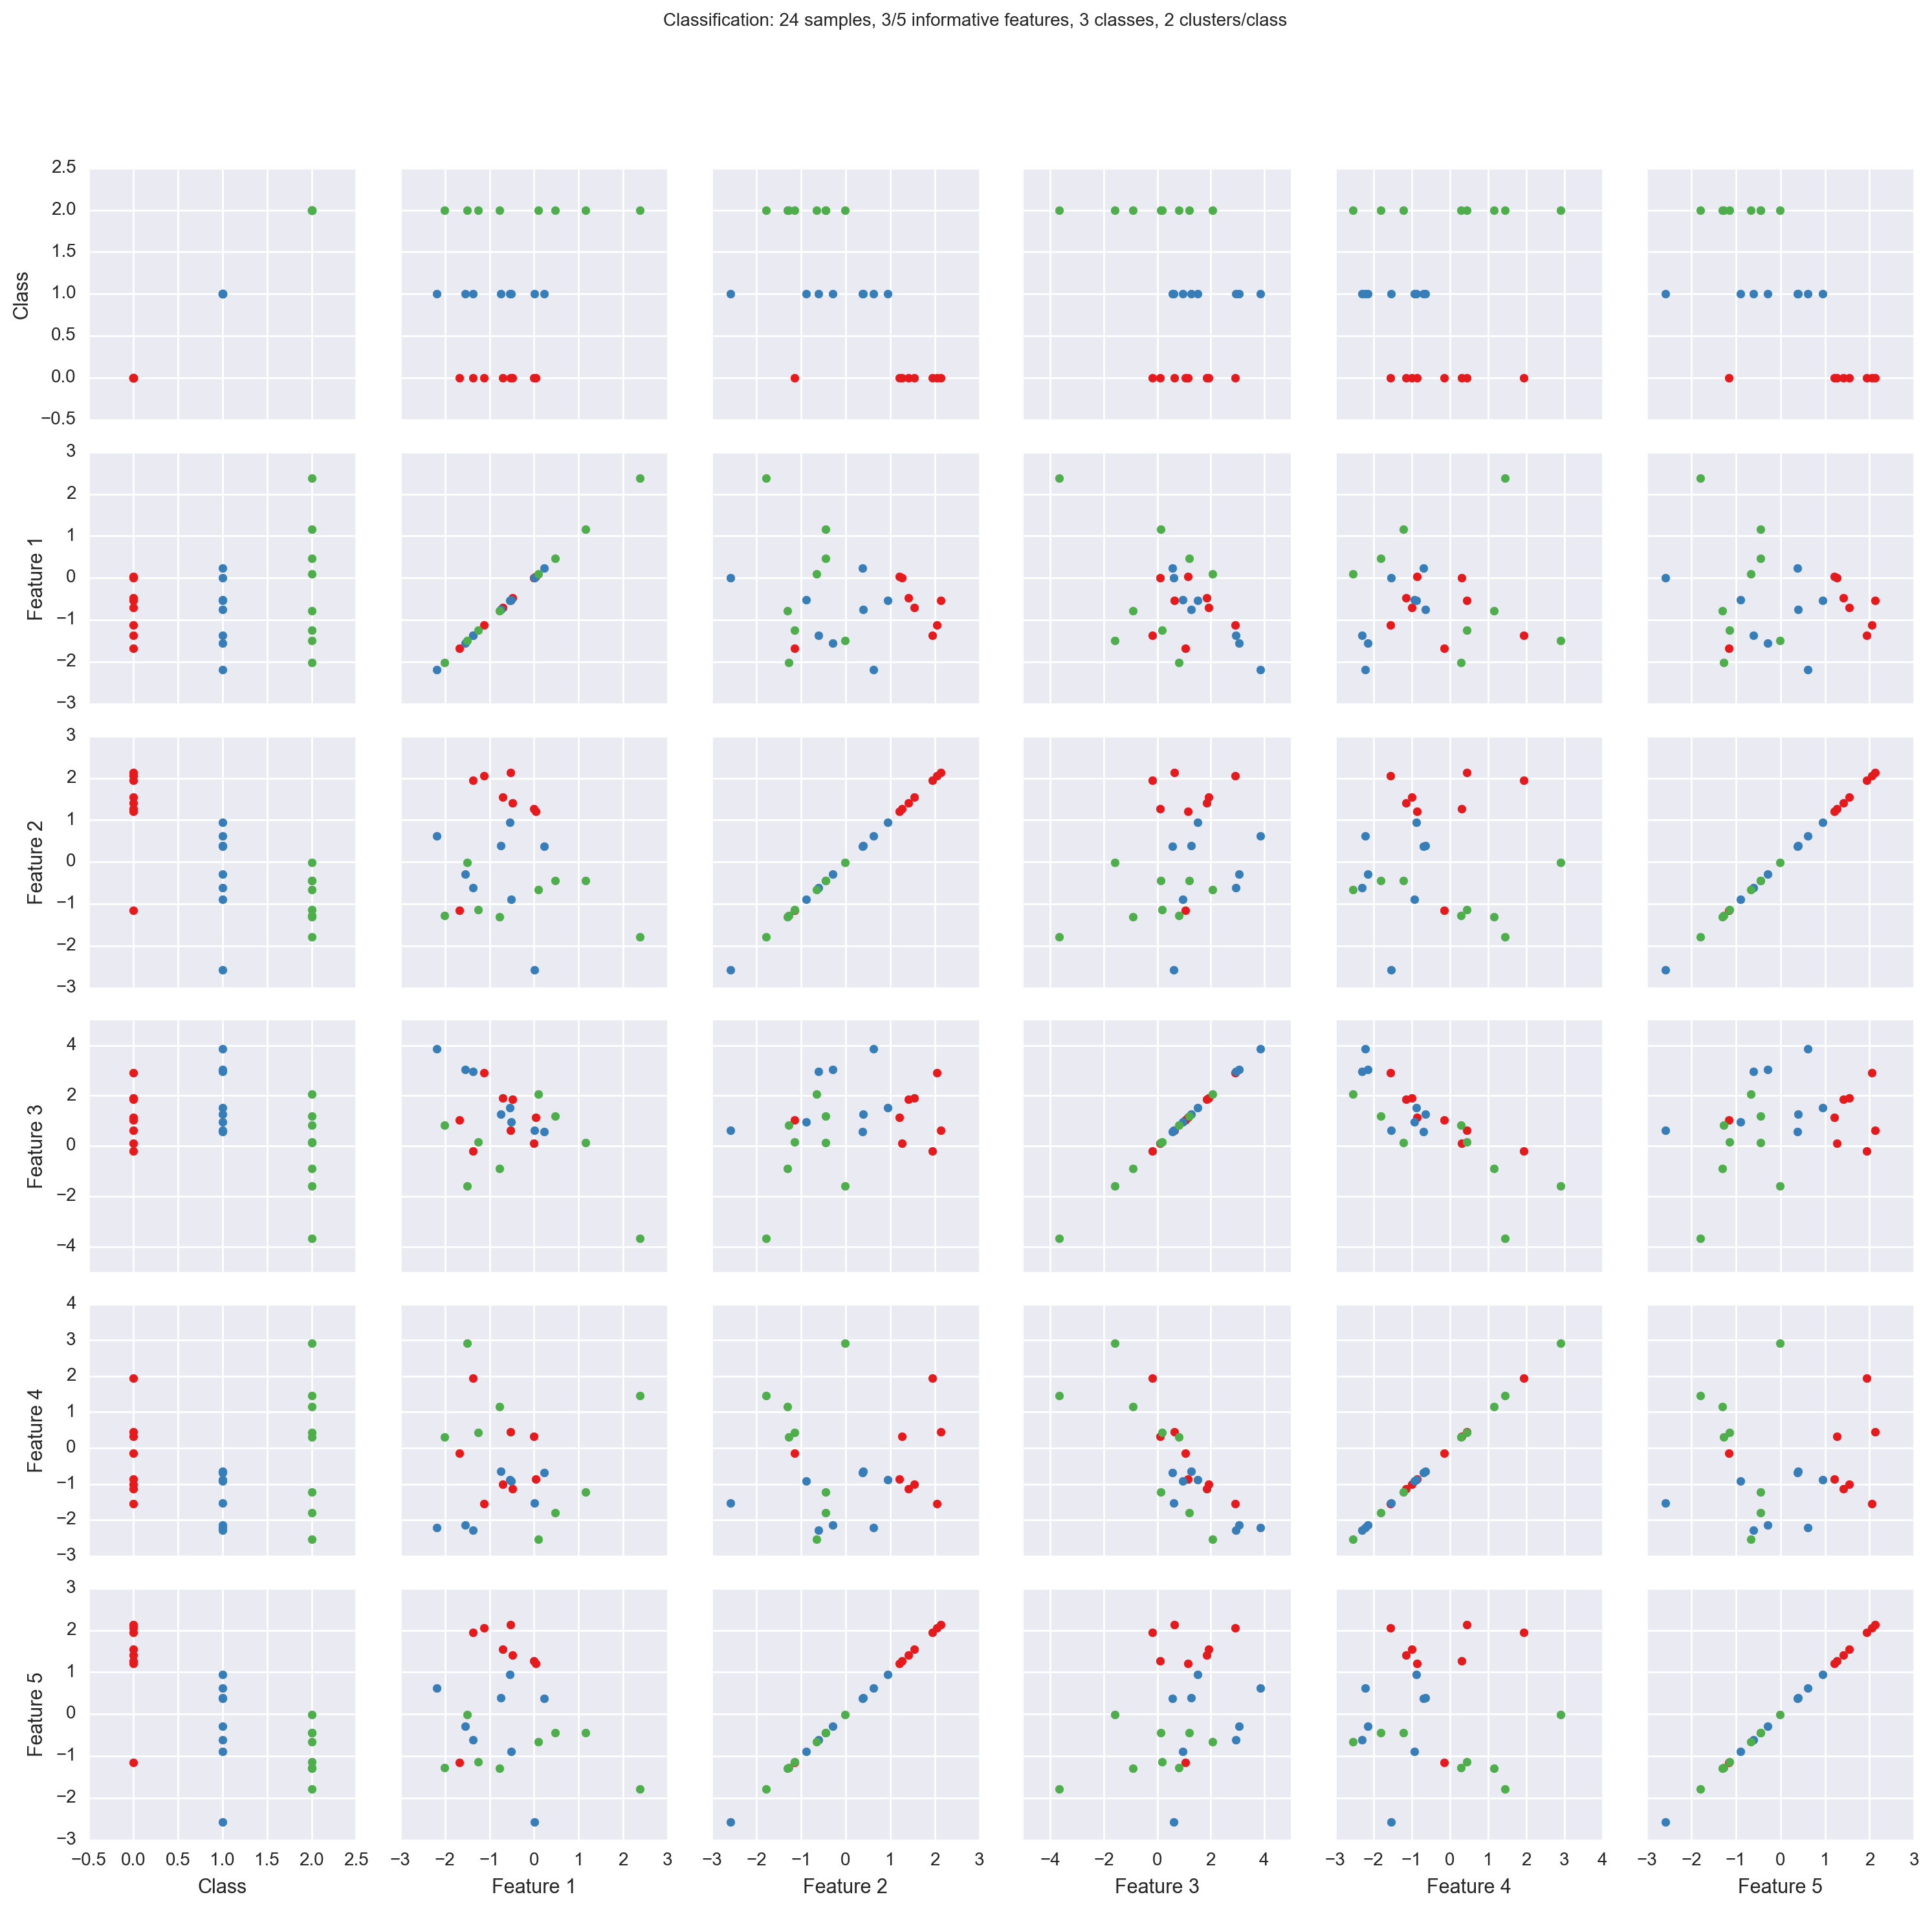

In [24]:
# make_classification - only some features informative

X, y = make_classification(n_samples=24, n_features=5, n_informative=3, n_redundant=1, 
                           n_repeated=1, n_classes=3, n_clusters_per_class=2, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Feature 3': X[:,2],
        'Feature 4': X[:,3],
        'Feature 5': X[:,4],
        'Class': y
    }).round(2)

g = sns.PairGrid(df, palette='Set1', hue='Class')
g = g.map(plt.scatter)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Classification: 24 samples, 3/5 informative features, 3 classes, 2 clusters/class')


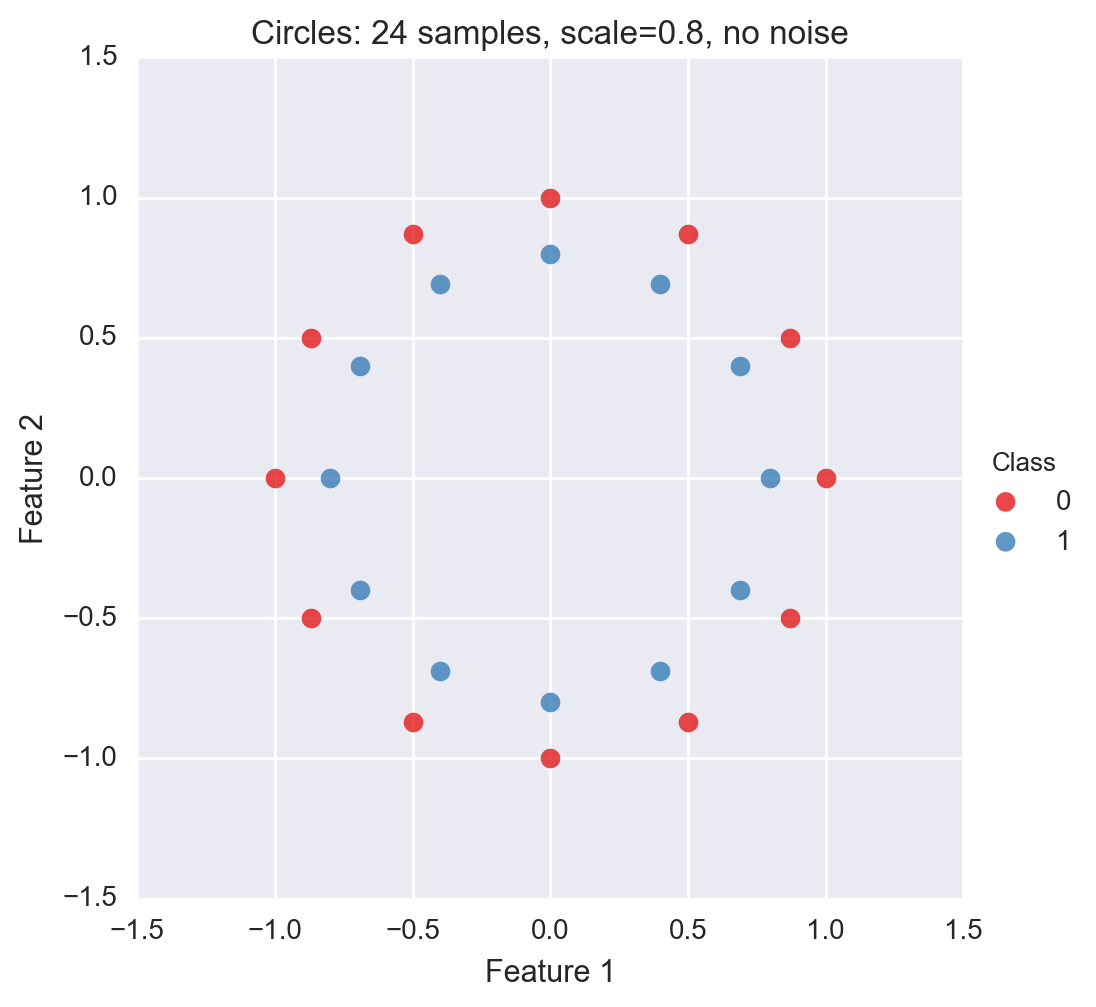

In [25]:
# make_circles - without noise

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=25, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class', 
               palette='Set1', scatter_kws={'s':50}, fit_reg=False)
plt.title('Circles: 24 samples, scale=0.8, no noise')


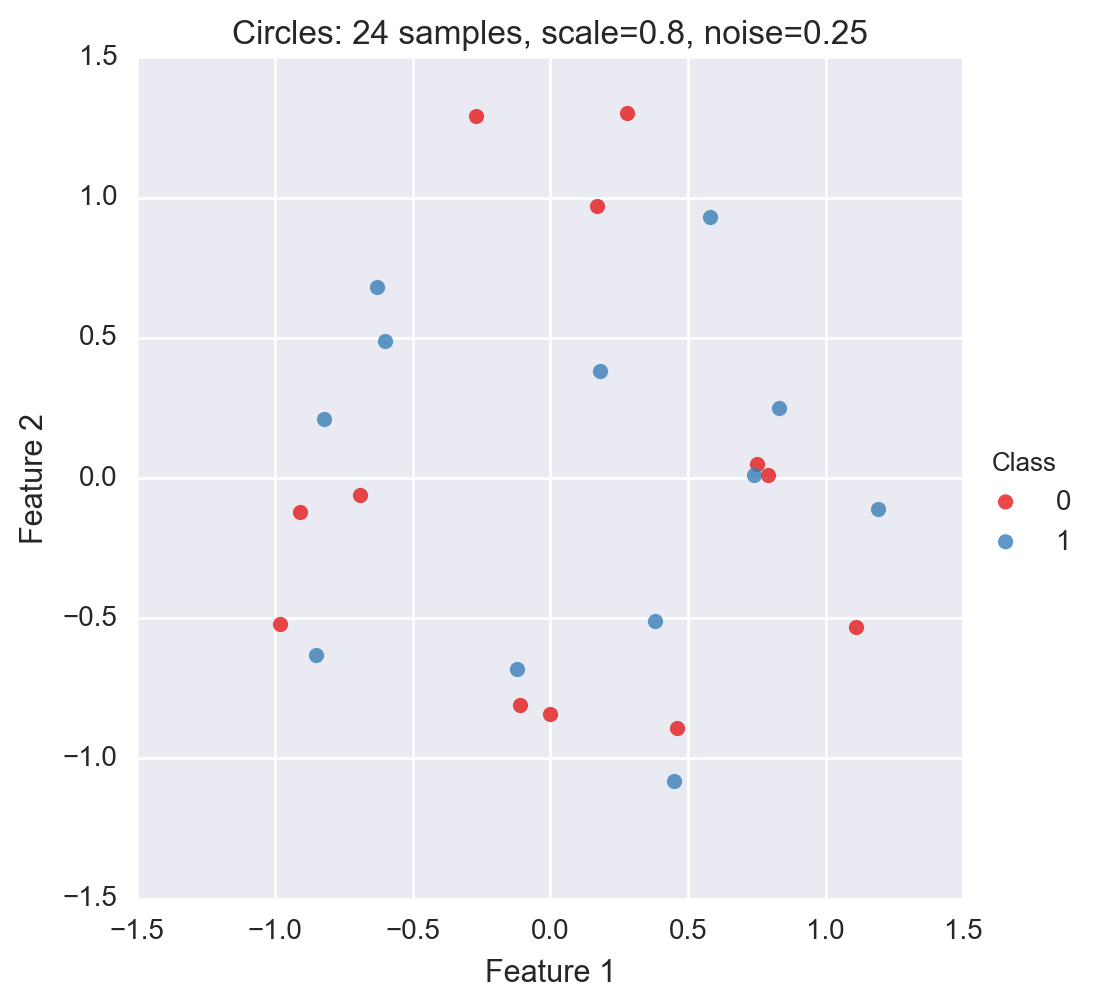

In [26]:
# make_circles - with noise

X, y = make_circles(n_samples=25, noise=0.25, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class', 
               palette='Set1', scatter_kws={'s': 30}, fit_reg=False)
plt.title('Circles: 24 samples, scale=0.8, noise=0.25')


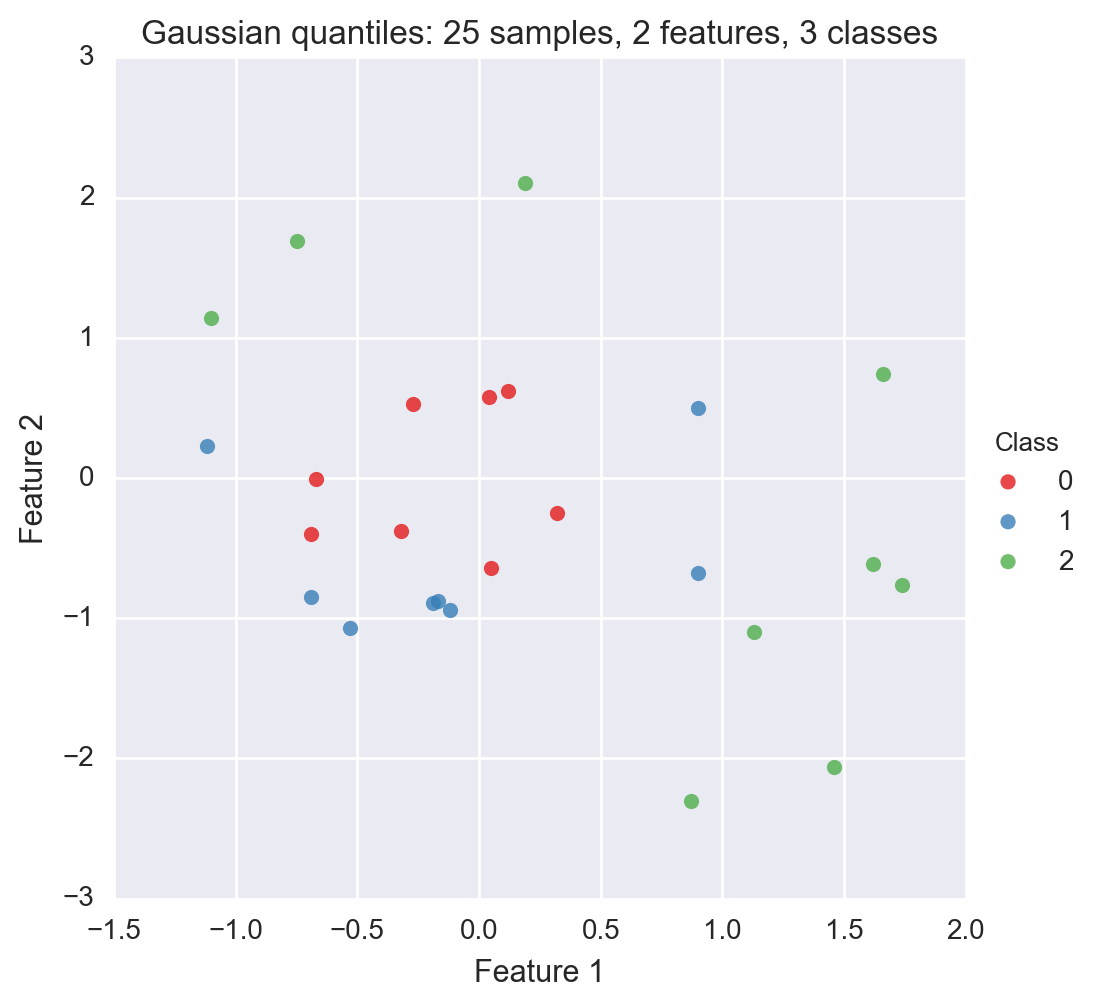

In [27]:
# make_gaussian_quantiles 

from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=25, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class',
              palette='Set1', scatter_kws={'s':30}, fit_reg=False)
plt.title('Gaussian quantiles: 25 samples, 2 features, 3 classes')


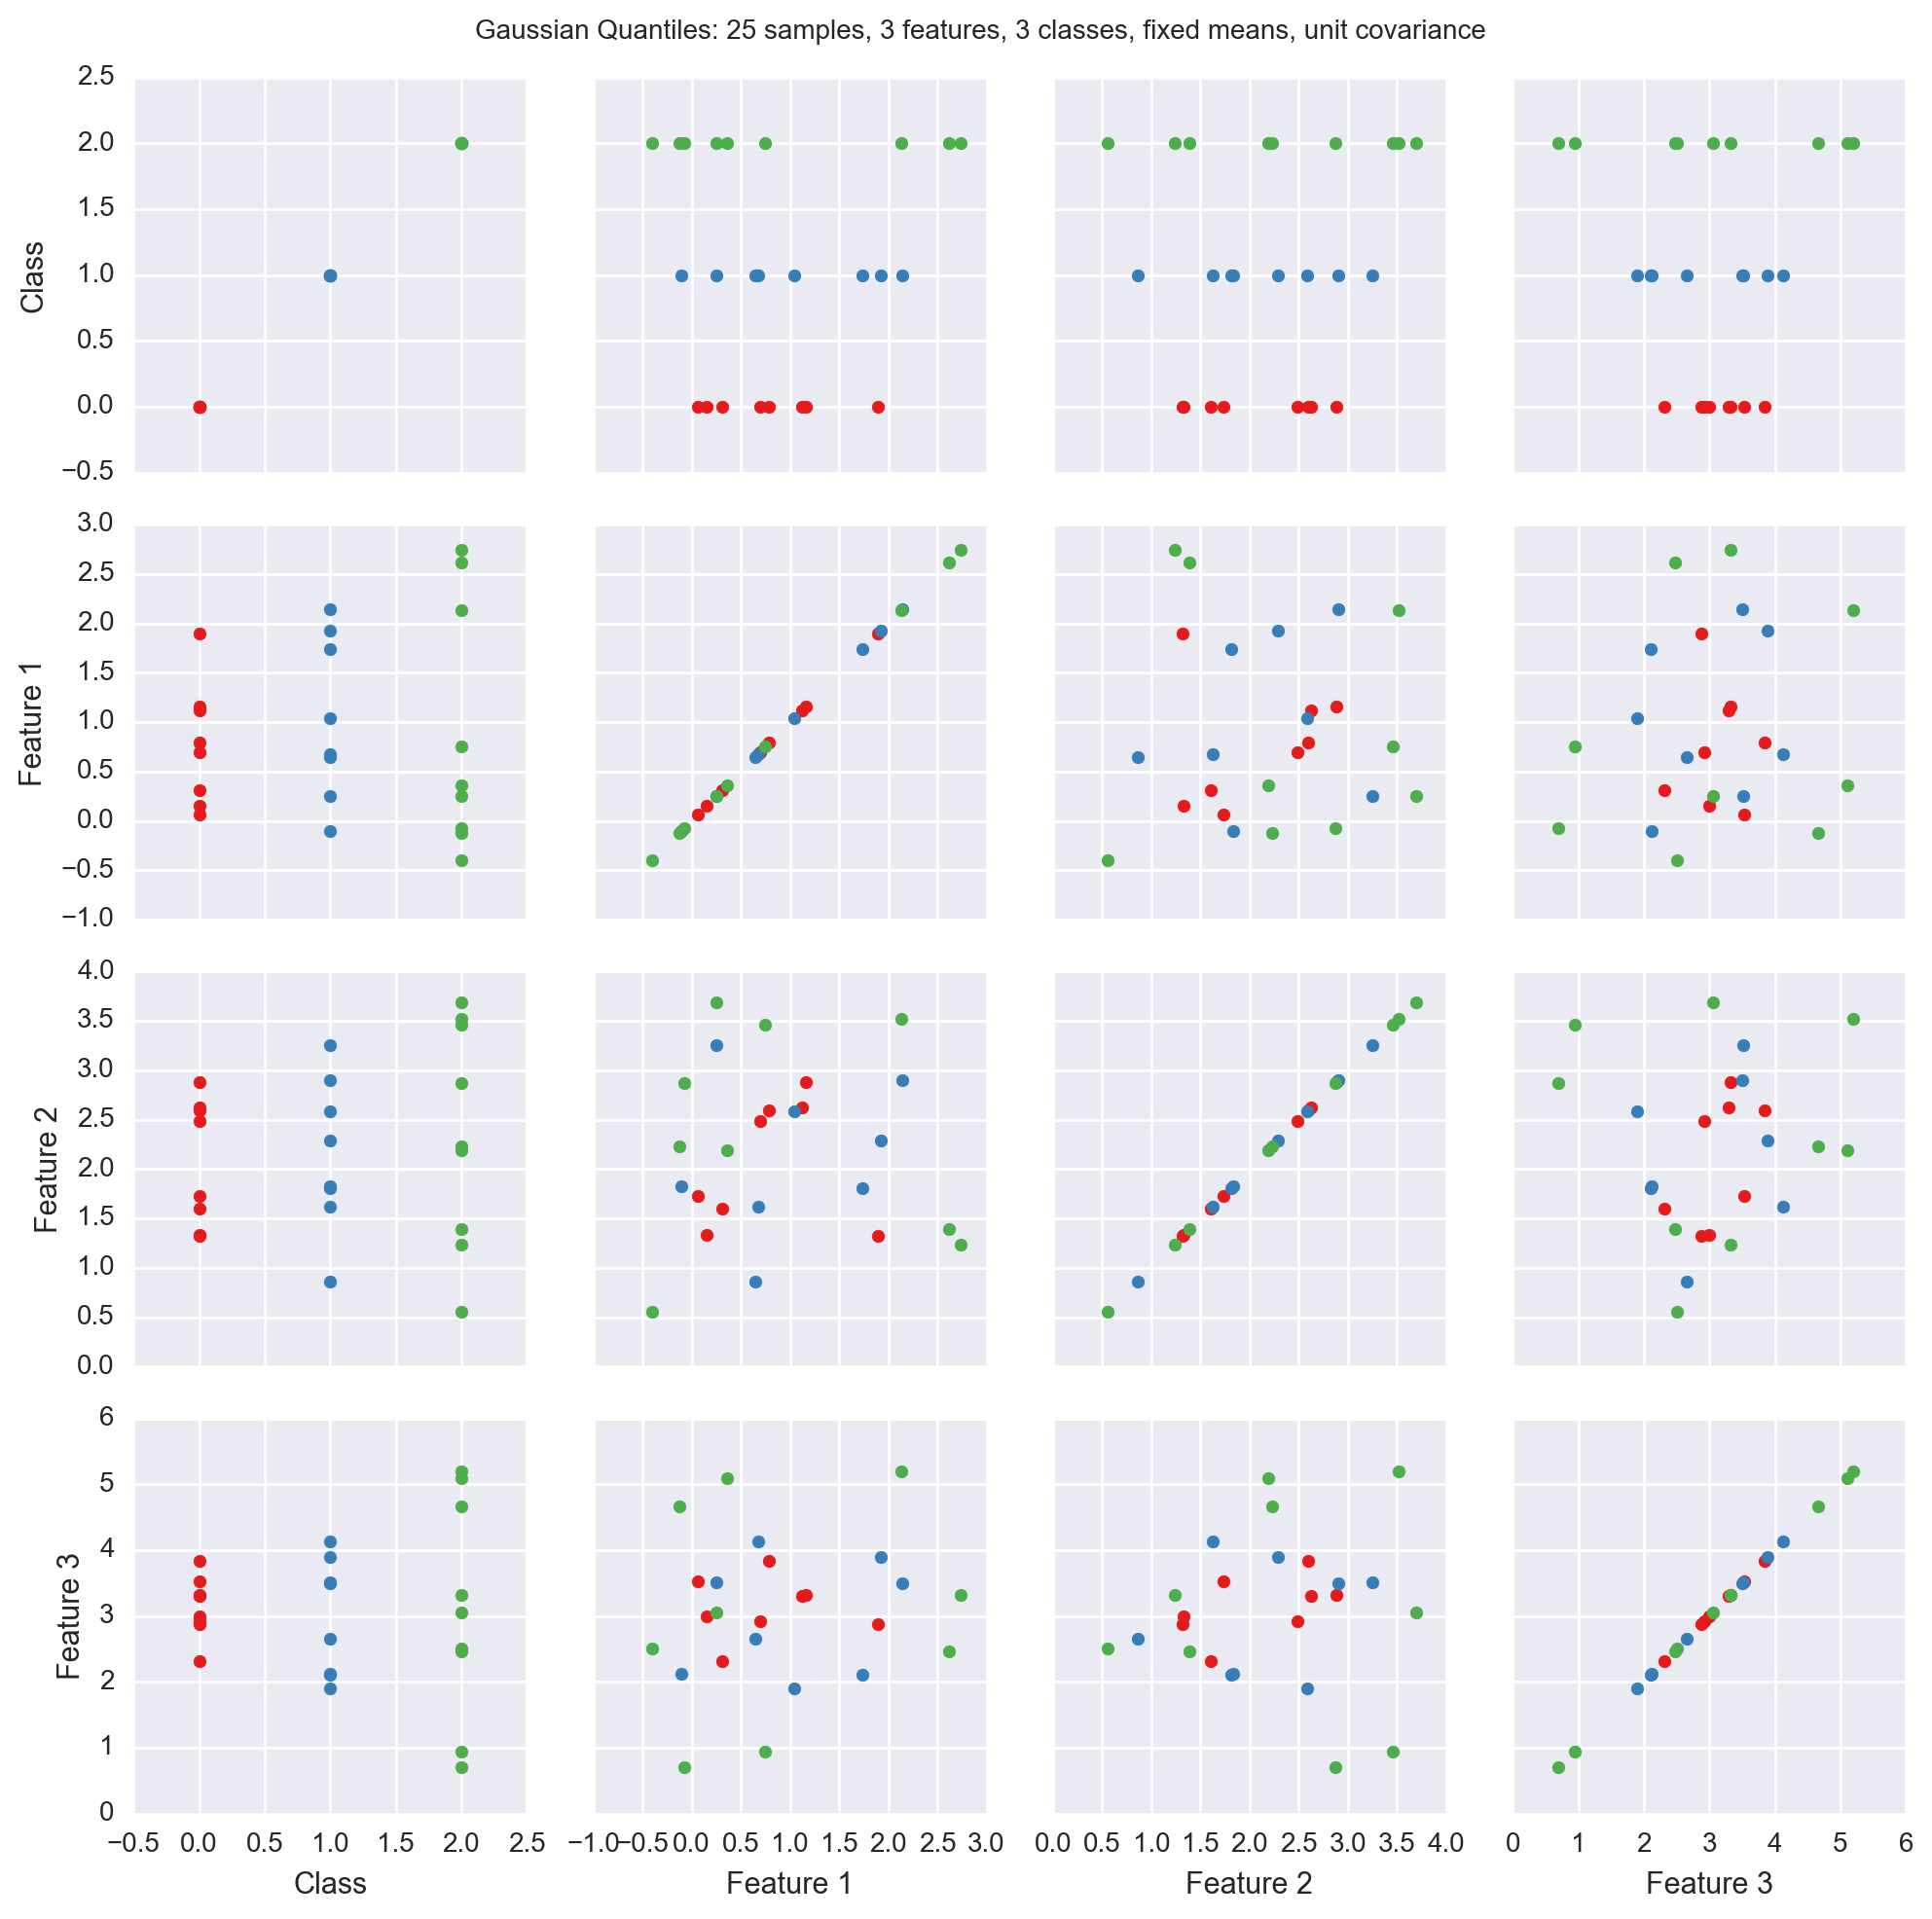

In [28]:
# make_gaussian_quantiles 

X, y = make_gaussian_quantiles(n_samples=25, n_features=3, mean=[1,2,3], n_classes=3, 
                               random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Feature 3': X[:,2],
        'Class': y
    }).round(2)

g = sns.PairGrid(df, hue='Class', palette='Set1')
g = g.map(plt.scatter)
plt.subplots_adjust(top=0.95)
g = g.fig.suptitle('Gaussian Quantiles: 25 samples, 3 features, 3 classes, fixed means, unit covariance')


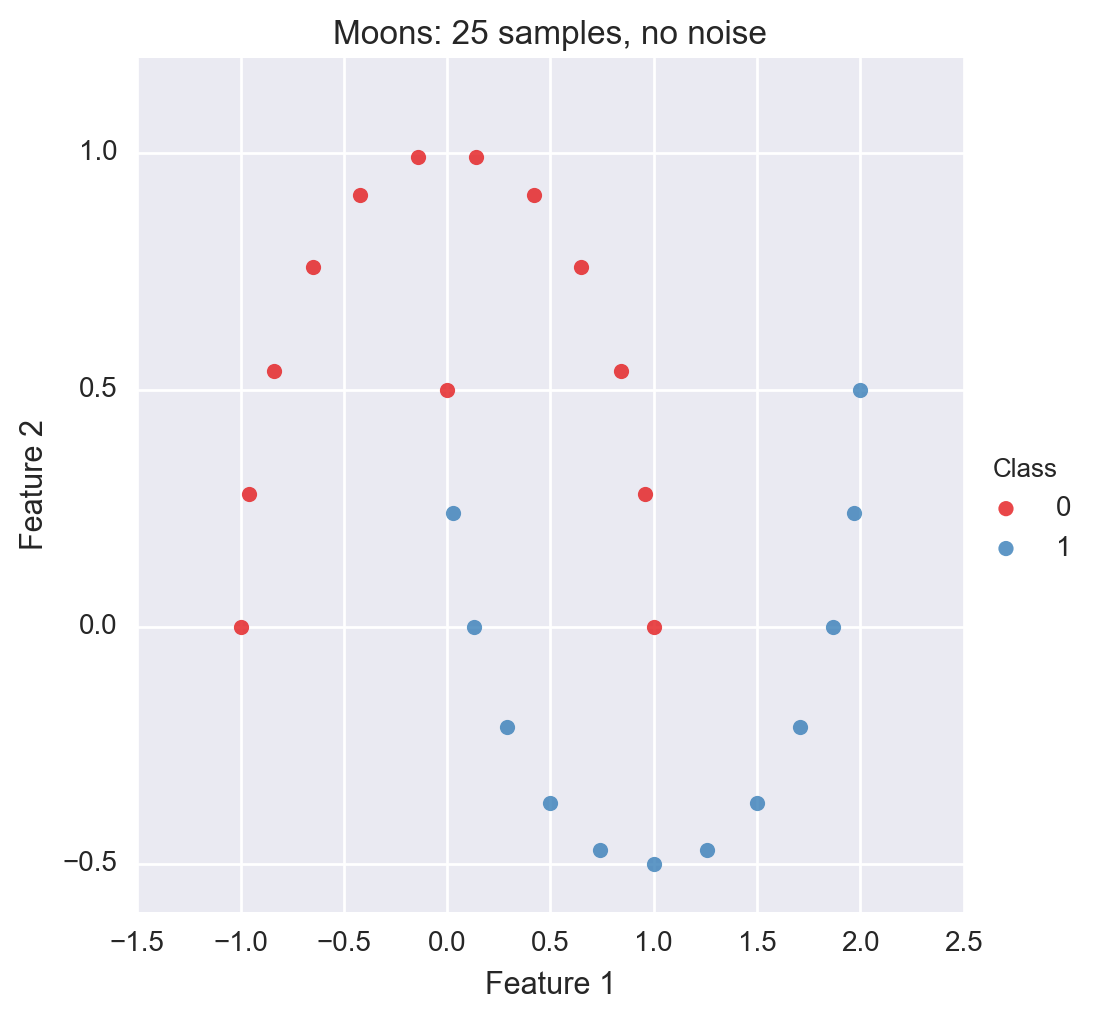

In [29]:
# make_moons - without noise

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=25, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class',
              palette='Set1', scatter_kws={'s':30}, fit_reg=False)
plt.title('Moons: 25 samples, no noise')


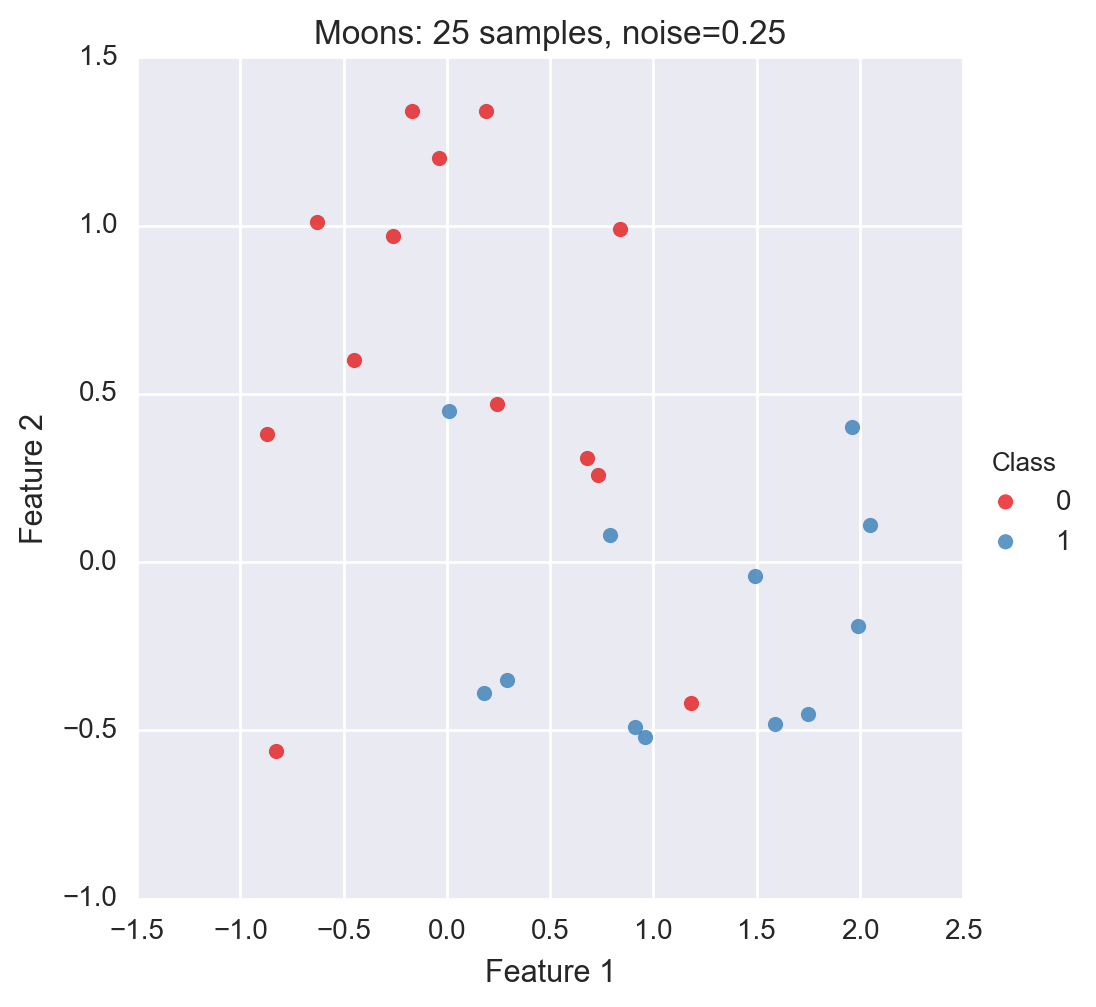

In [30]:
# make_moons - with noise

X, y = make_moons(n_samples=25, noise=0.25, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Class': y
    }).round(2)

g = sns.lmplot(x='Feature 1', y='Feature 2', data=df, hue='Class',
              palette='Set1', scatter_kws={'s':30}, fit_reg=False)
plt.title('Moons: 25 samples, noise=0.25')


coef = [ 13.74747041  90.34019153]


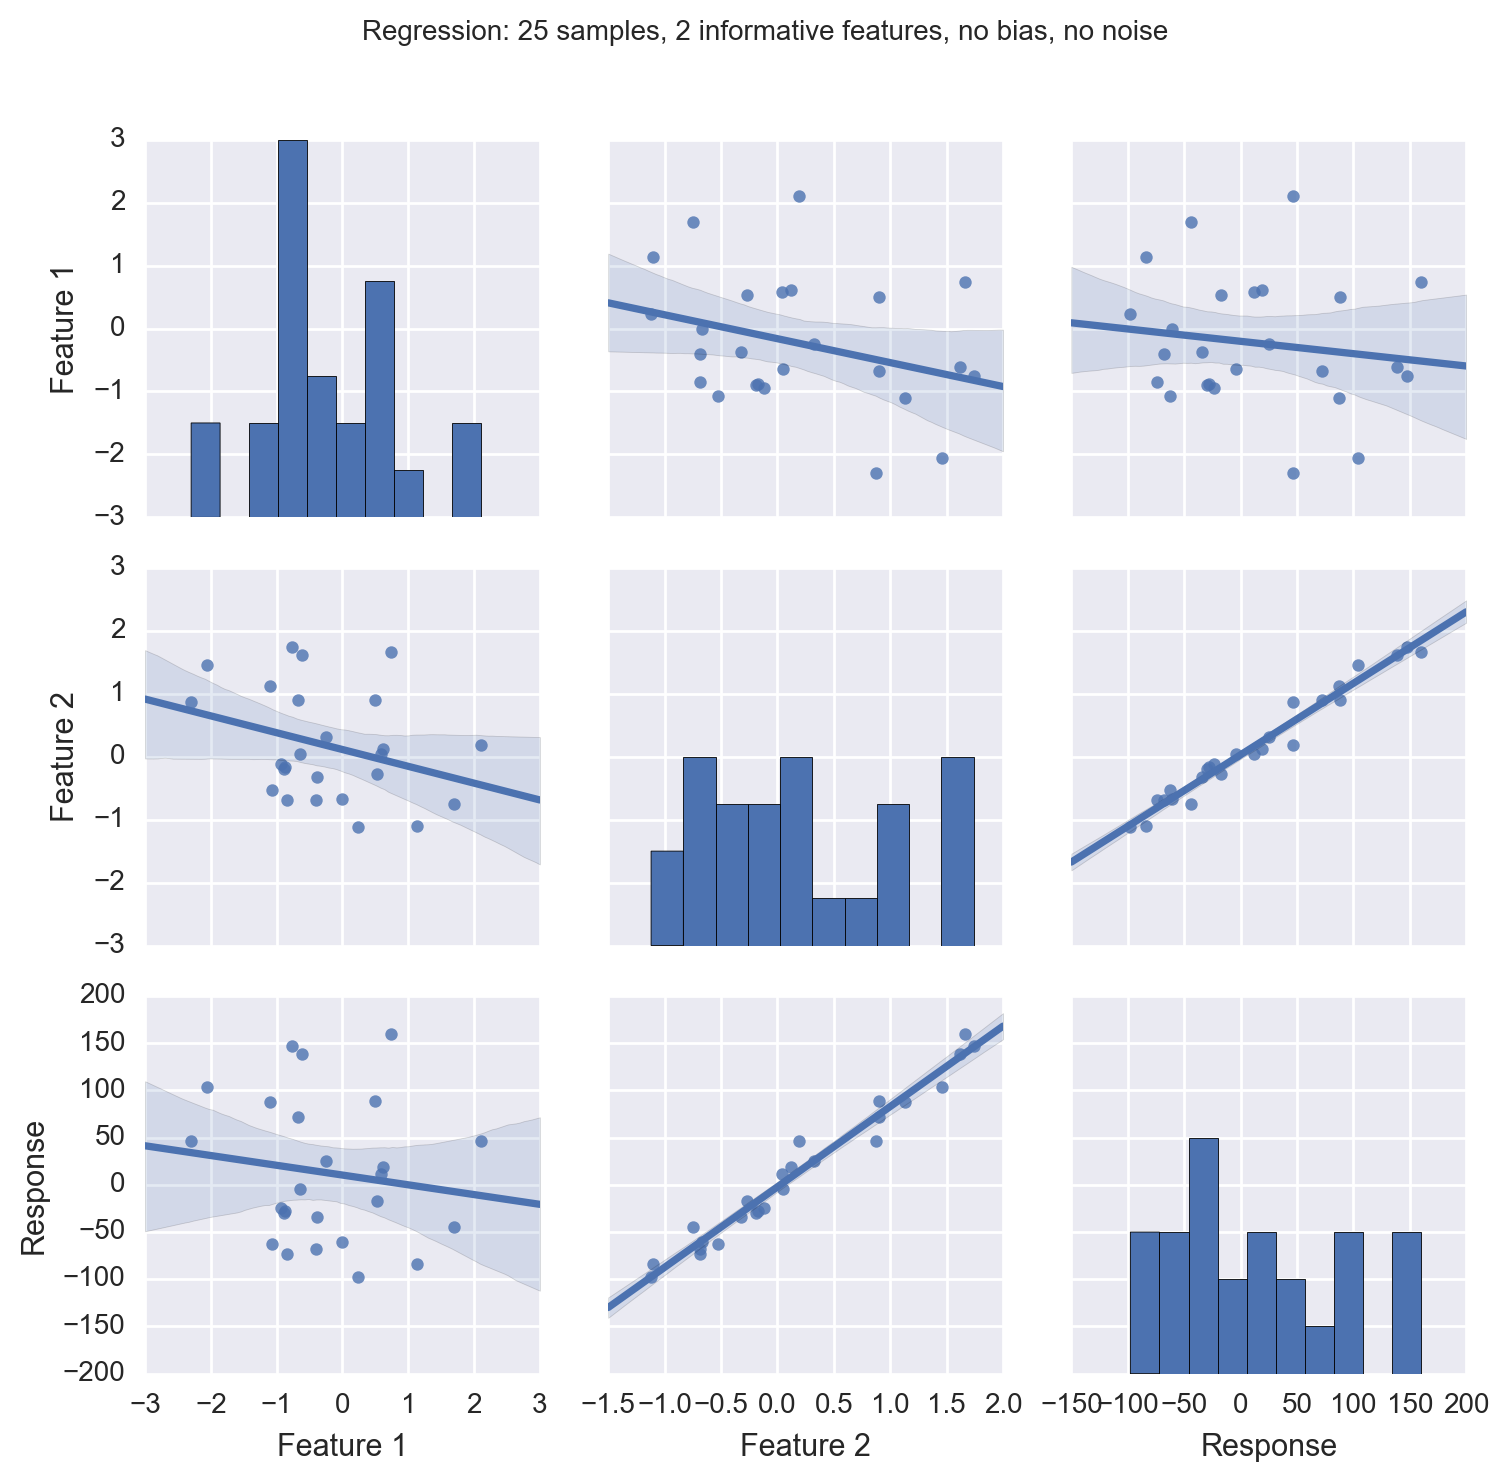

In [31]:
# make_regression - all features informative

from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=25, n_features=2, n_informative=2, coef=True, 
                             random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Response': y
    }).round(2)
print 'coef = {}'.format(coef)

g = sns.pairplot(df, kind='reg')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Regression: 25 samples, 2 informative features, no bias, no noise')


coef = [ 13.74747041  90.34019153]


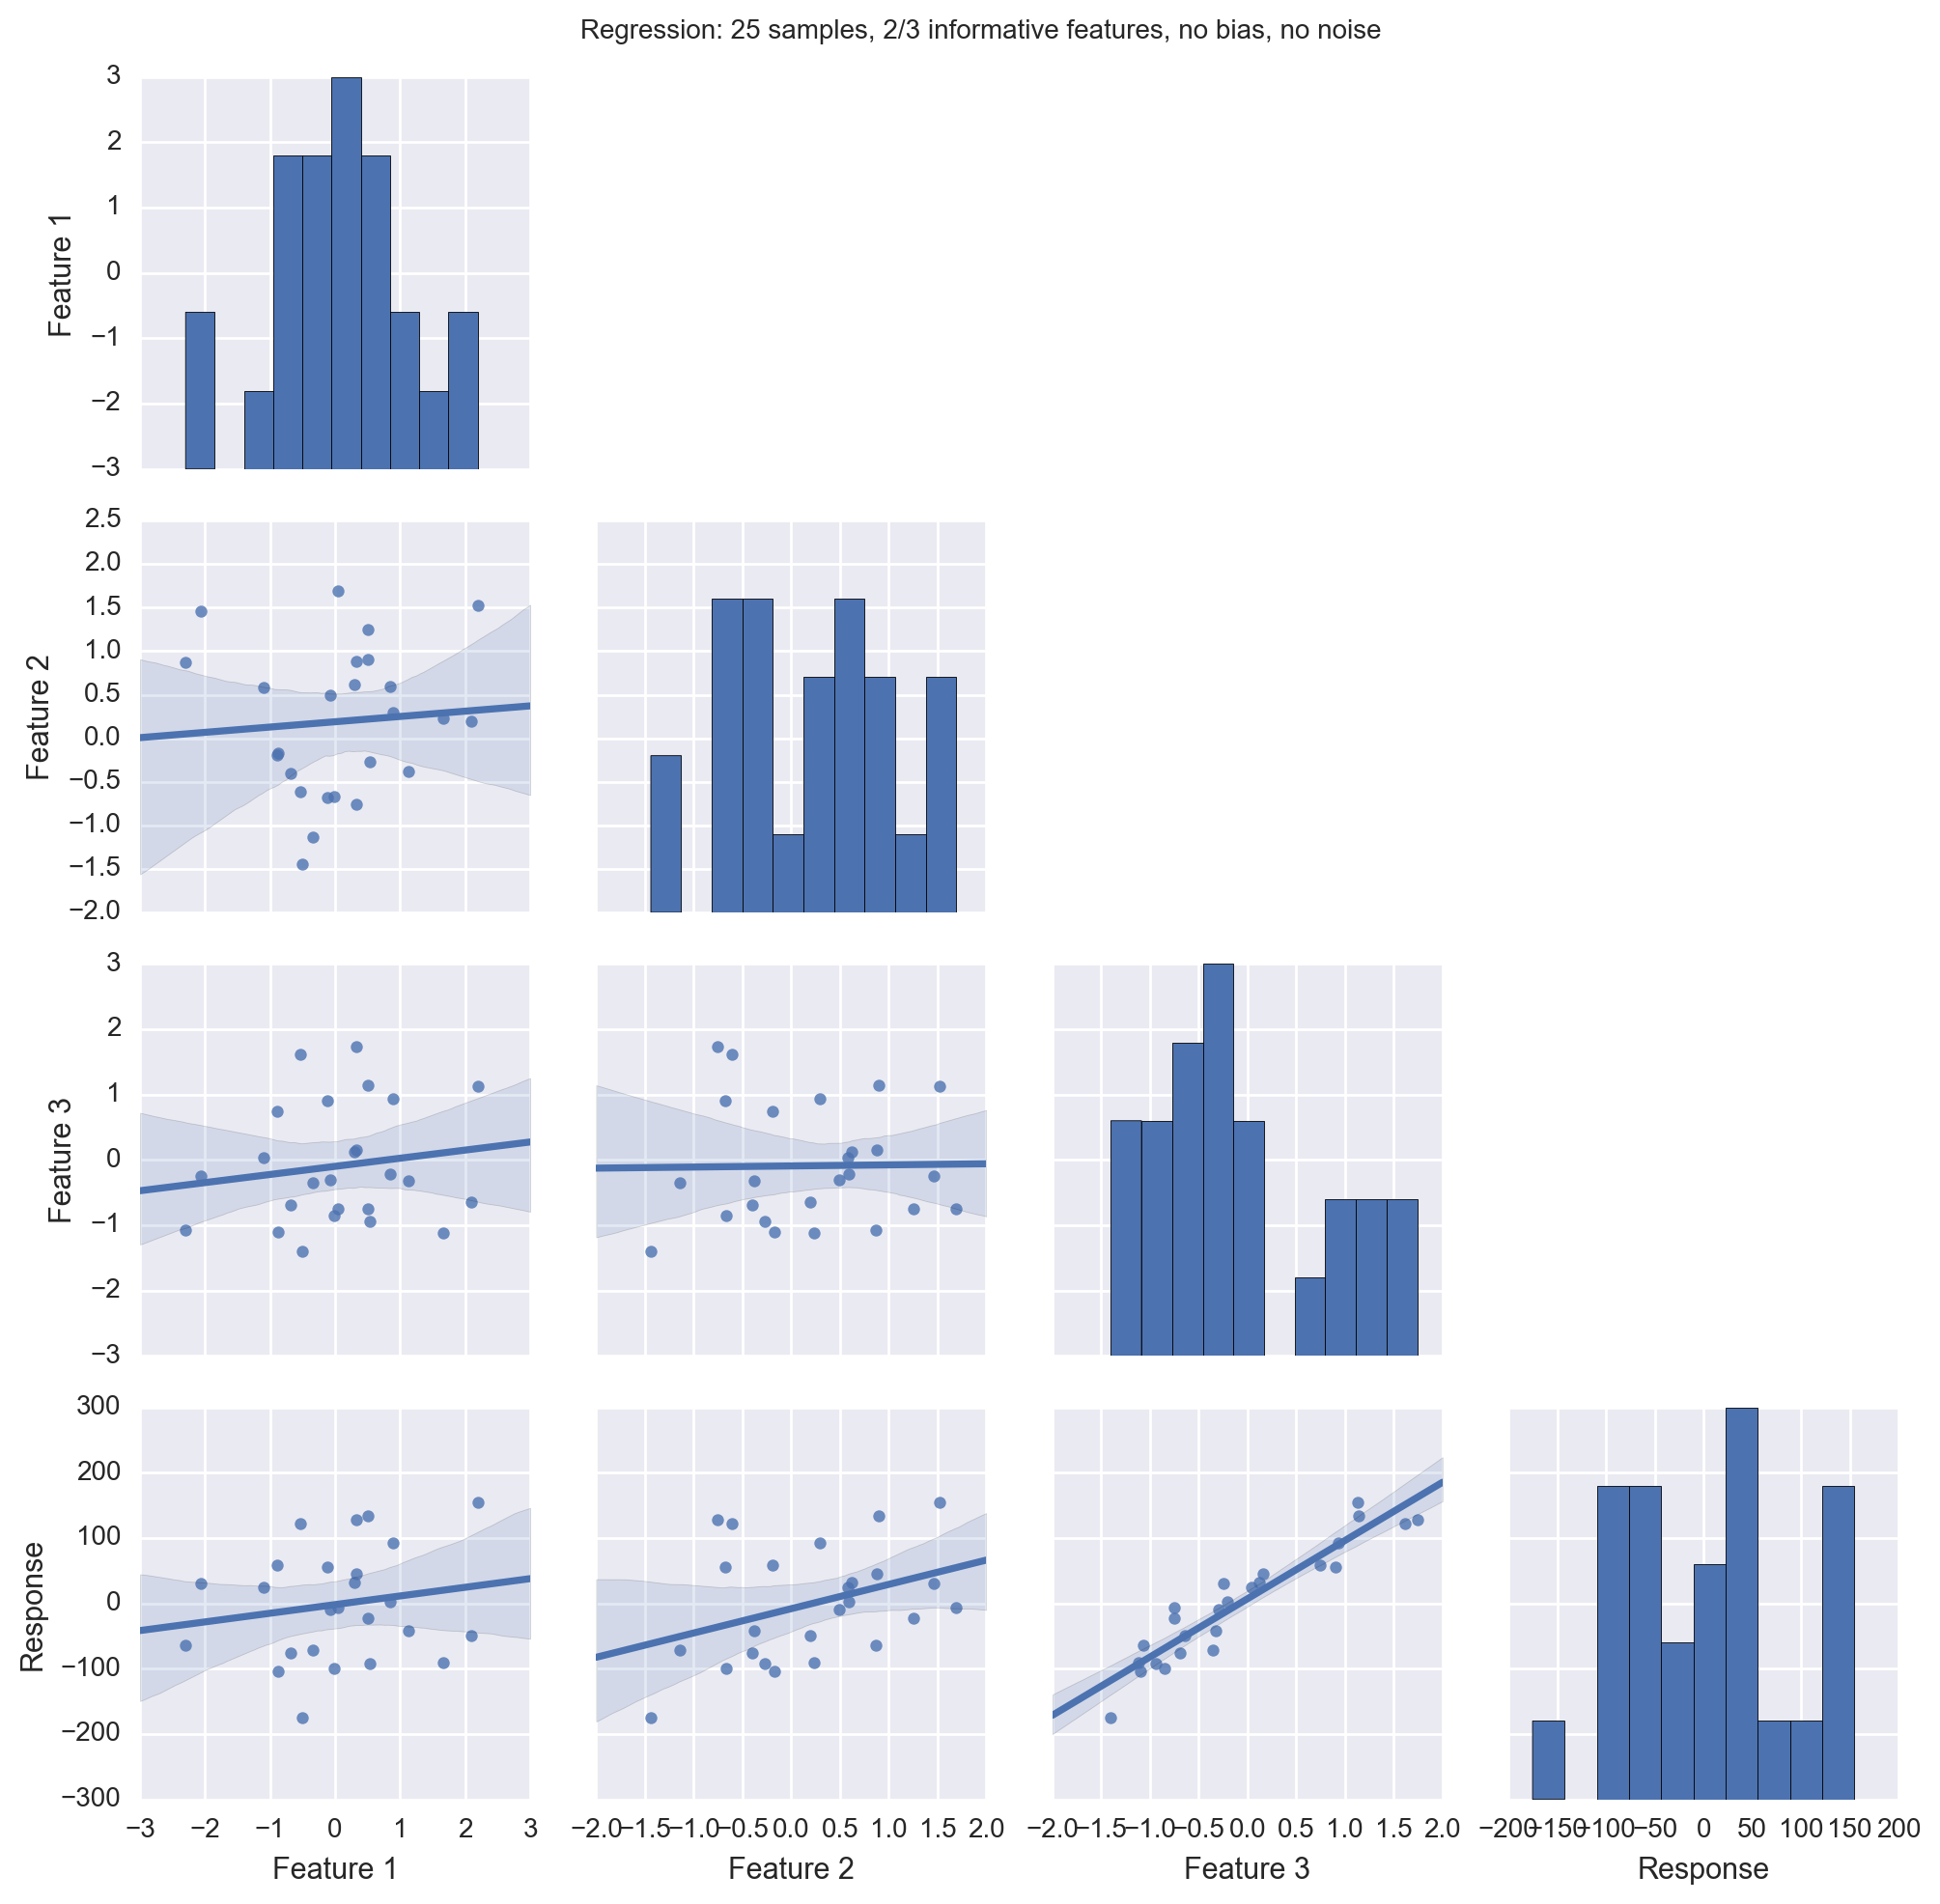

In [32]:
# make_regression - only some features informative

X, y = make_regression(n_samples=25, n_features=3, n_informative=2, random_state=1)

df = pd.DataFrame({
        'Feature 1': X[:,0],
        'Feature 2': X[:,1],
        'Feature 3': X[:,2],
        'Response': y
    }).round(2)
print 'coef = {}'.format(coef)

g = sns.pairplot(df, kind='reg')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i,j].set_visible(False)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Regression: 25 samples, 2/3 informative features, no bias, no noise')
